In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
PARAMS_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\Phenobottle Parameters Chapter 4\\"
OUTPUT_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Organised Data"

In [3]:
# Add header to each of the params files
data = list()
for i in range (1, 11):
    if i != 5:
        data_import = pd.read_csv(PARAMS_DIR + "PB{}Params.csv".format(i), names=["sql_time","day_night", "od_raw", 
                                                                                  "transmittance","optical_density",
                                                                                  "temperature", "LIGHT_INTENSITY","fo", 
                                                                                  "f_300us", "fj", "fi", "fm", 
                                                                                  "variable_fluorescence","quantum_yield", 
                                                                                  "vj", "fm_qa", "mo", "performance_index",
                                                                                  "fj_fo", "fi_fo", "fi_fj", "fm_fi", 
                                                                                  "fo_od", "fj_od", "fi_od","fm_od", 
                                                                                  "variable_fluorescence_od", "fm_qa_od"])
        data.append(data_import)


In [4]:
#pH Data
ph_whiteAv = [8.816, 9.37, 9.85, 10.01, 9.56]
ph_rgbAv = [9.04, 9.51, 9.80, 10.16, 9.86]
ph_rbAv = [9.16, 9.63, 9.99, 10.38, 10.01]
ph_whiteStdev = [0.02, 0.07, 0.04, 0.02, 0.08]
ph_rgbStdev = [0.14, 0.04, 0.08, 0.05, 0.04]
ph_rbStdev = [0.14, 0.03, 0.09, 0.02, 0.10]

In [5]:
#EtrMAX Data
etrmax_whiteAv = [62.1, 70.93, 68.77, 60.5, 59.47]
etrmax_whiteStdev = [3.01, 3.41, 5.63, 4.38, 3.26]
etrmax_rgbAv = [76.3, 86.13, 84.03, 71.1, 70.93] 
etrmax_rgbStdev = [0.543, 2.17, 0.76,0.57, 0.73]
etrmax_rbAv = [86.1, 99.53, 95.37, 74.87, 77.93]
etrmax_rbStdev = [1.20, 3.60, 3.80, 1.17, 2.47]

In [103]:
## Get data from Optical density & pH 
parameters = ["sql_time","day_night", "od_raw", "transmittance","optical_density","temperature", "LIGHT_INTENSITY","fo", 
              "f_300us", "fj", "fi", "fm", "variable_fluorescence","quantum_yield", "vj", "fm_qa", "mo", "performance_index", 
              "fj_fo", "fi_fo", "fi_fj", "fm_fi", "fo_od", "fj_od", "fi_od","fm_od", "variable_fluorescence_od", "fm_qa_od"]
parameterofInterest = "quantum_yield"
index = np.arange(0, 16.33, .174)
PB1, PB2, PB3 = [], [], []
PB6, PB7, PB8 = [], [], []
PB4, PB9, PB10 = [], [], []
for i in range(len(data[0])):
    try:
        if data[0]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB1.append(round((data[0][parameterofInterest][i+x]), 3))

        if data[1]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB2.append(round((data[1][parameterofInterest][i+x]), 3))
        
        if data[2]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB3.append(round((data[2][parameterofInterest][i+x]), 3))
        
        if data[4]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB6.append(round((data[4][parameterofInterest][i+x]), 3))

        if data[5]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB7.append(round((data[5][parameterofInterest][i+x]), 3))
        
        if data[6]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB8.append(round((data[6][parameterofInterest][i+x]), 3))
        
        if data[3]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB4.append(round((data[3][parameterofInterest][i+x]), 3))

        if data[7]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB9.append(round((data[7][parameterofInterest][i+x]), 3))
        
        if data[8]["sql_time"][i][:16] == "2020/04/04 06:30":
            for x in range(94):
                PB10.append(round((data[8][parameterofInterest][i+x]), 3))
       
    except KeyError:
        pass
print(len(index))

94


In [104]:
# Calculate Optical density averages and StDev
def normalize_data_min(data):
    return (data - data[0])

# PB1 = normalize_data_min(PB1)
# PB2 = normalize_data_min(PB2)
# PB3 = normalize_data_min(PB3)

# PB6 = normalize_data_min(PB6)
# PB7 = normalize_data_min(PB7)
# PB8 = normalize_data_min(PB8)

# PB4 = normalize_data_min(PB4)
# PB9 = normalize_data_min(PB9)
# PB10 = normalize_data_min(PB10)

white_od_av = []
rgb_od_av = []
rb_od_av = []
white_od_stdev = []
rgb_od_stdev = []
rb_od_stdev = []
for i in range(94):
    white_od_av.append(np.average([PB1[i], PB2[i], PB3[i]]))
    rgb_od_av.append(np.average([PB6[i], PB7[i], PB8[i]]))
    rb_od_av.append(np.average([PB4[i], PB9[i], PB10[i]]))
    white_od_stdev.append(np.std([PB1[i], PB2[i], PB3[i]]))
    rgb_od_stdev.append(np.std([PB6[i], PB7[i], PB8[i]]))
    rb_od_stdev.append(np.std([PB4[i], PB9[i], PB10[i]]))

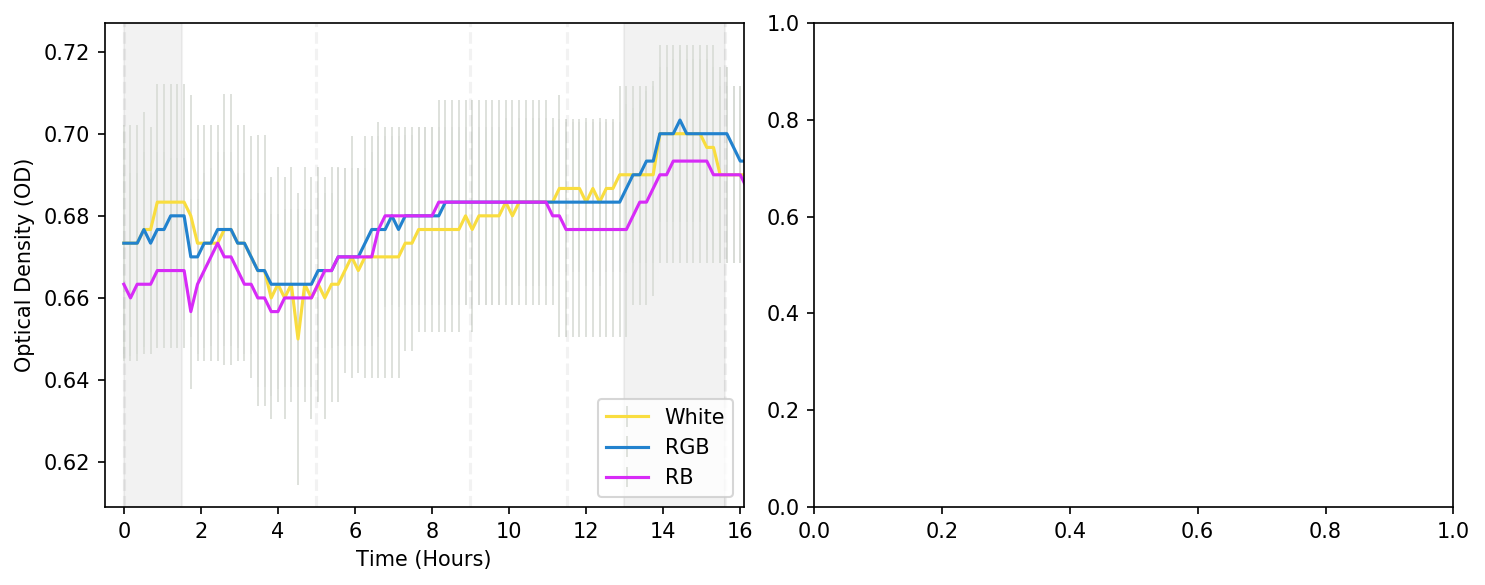

In [106]:
# Plot Optical Density and pH
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=150)
labels = ["Pre-Dawn", "Dawn", "Midday", "Afternoon", "Night"]
x_vals = [0, 5, 9, 11.5, 15.624]
y_pos = [0.267, 0.29, 0.355, 0.400, 0.400]



for i in range(len(labels)):
    ax.axvline(x=x_vals[i], ymin=0, ymax=1, color='k', alpha=0.05, linestyle="--")
    
ax.errorbar(index, white_od_av, yerr=white_od_stdev, color="#f9dd3f", ecolor="xkcd:light grey", elinewidth=0.8, label="White")
ax.errorbar(index, rgb_od_av, yerr=rgb_od_stdev, color="#2282ce", ecolor="xkcd:light grey", elinewidth=0.8, label="RGB")
ax.errorbar(index, rb_od_av, yerr=rb_od_stdev, color="#d72bf7", ecolor="xkcd:light grey", elinewidth=0.8, label="RB")


# for i in range(len(labels)):
#     if i == 0:
#         ax.text(x=x_vals[i], y=y_pos[i], s=labels[i], horizontalalignment="left", rotation=0)
#         ax.arrow(x=x_vals[i], y=y_pos[i], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
#                 facecolor="w")
#     else:
#         ax.text(x=x_vals[i], y=y_pos[i], s=labels[i], horizontalalignment="right", rotation=0)
#         ax.arrow(x=x_vals[i], y=y_pos[i], dx=0, dy=-0.005, head_width=0.4, head_length=0.003, length_includes_head=True, 
#                 facecolor="w")
        
# ax.text(-0.5, 0.405, s="(a)")
# ax1.text(x=-0.5, y = 10.38, s="(b)")


ax.axvspan(0, 1.5, alpha=0.1, color="grey")
ax.axvspan(13, 15.624, alpha=0.1, color="grey")

ax.set_xlim(-0.5, 16.1)
ax.set_ylabel("Optical Density (OD)")
ax.set_xlabel("Time (Hours)")
# ax.set_yticks(np.arange(0.23, 0.42, 0.02))

ax.legend(loc="lower right")
plt.tight_layout()
#plt.savefig(OUTPUT_DIR + "Figure1.png", dpi=300)

In [3]:
#Import OJIP Data

bottles = [1, 2, 3, 4, 6, 7, 8, 9, 10]
colors = ["red", "green", "blue", "orange", "magenta", "yellow", "black", "brown", "cyan"]
OJIP_DIR = "C:\\Users\\Owner\\OneDrive - UTS\\Chapter 4\\Chapter 4 Experimental Data\\OJIP Curves\\"

dates = ["2020/04/04 08:00", "2020/04/04 10:10", "2020/04/04 14:20", "2020/04/04 19:40", "2020/04/04 21:50"]

# For bottle in bottles:
last_digit = {}
for bottle in bottles:
    try:
        ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                              "value_ojip", "norm_ojip"])
        time_ojip = [float(s) for s in ojip_data["time_ojip"][1].split(",")]
        last_ojip = []
        for i in range(len(ojip_data)):
            for v in range(len(dates)):
                if ojip_data["sql_time"][i][:16] == dates[v]:
                    value_ojip = [float(s) for s in ojip_data["norm_ojip"][i].split(",")][-1]
                    last_ojip.append(value_ojip)
                else:
                    pass
        last_digit["Bottle{}".format(bottle)] = last_ojip
    
    except KeyError:
        pass


In [36]:
bottle = 4
dates = ["2020/04/04 07:00", "2020/04/04 09:00", "2020/04/04 14:10", "2020/04/04 19:10", "2020/04/04 21:20"]


ojip_data = pd.read_csv(OJIP_DIR + "PB{}Curves.csv".format(bottle), names=["sql_time", "day_night", "time_ojip", 
                                                                              "value_ojip", "norm_ojip"])
time_ojip = [float(s) for s in ojip_data["time_ojip"][1].split(",")]
last_ojip = []
for i in range(len(ojip_data)):
    for v in range(len(dates)):
        if ojip_data["sql_time"][i][:16] == dates[v]:
            value_ojip = [float(s) for s in ojip_data["norm_ojip"][i].split(",")][-1]
            last_ojip.append(value_ojip)
        else:
            pass

last_ojip

[0.821, 0.826, 0.808, 0.826, 0.838]